PUI HW6 - Time Series Analysis (FT)

In [1]:
#Module Import
import pandas as pd
import numpy as np
import pylab as pl
import statsmodels.api as sm
import json
import os

pltfmt = json.load(open(os.getenv('PUI2015')+ '/plotformat.json'));
pl.rcParams.update(pltfmt)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#Pulling in the MTA fares as a numpy array
mtaFare_array = np.load(os.getenv('PUI2015')+'/mta_fare.npy')
mtaFare_array.shape

(600, 23, 194)

In [3]:
#There are negative values so replacing them with the median of all the positive 
#I'd argue that median is more appropriate than mean because it avoids 
#increasing the influence outliers

MTAfareMedian = numpy.median(mtaFare_array[mtaFare_array > 0.0])
MTAfareMean = numpy.mean(mtaFare_array[mtaFare_array > 0.0])
print "Median:", MTAfareMedian
print "Mean: %.4f" % MTAfareMean
mtaFare_array[mtaFare_array==-1] = MTAfareMedian

Median: 254.0
Mean: 4550.4165


In [4]:
#Ridetypes Creation
ridetype_array = np.array(['10t', 
                     '14d', 
                     '1d', 
                     '2t', 
                     '30d', 
                     '7d', 
                     'ada', 
                     'afas', 
                     'exp',
                     'ez',
                     'ff',
                     'mc',
                     'mr',
                     'month',
                     'rfm',
                     'rr',
                     'sen',
                     'spec',
                     'tcmc',
                     't',
                     'umlim',
                     'xbus',
                     'stud'])

#Assigning Date Ranges
mtaDates_array = pd.date_range('05/21/2010', periods = 194, freq = 'W')
mtaDates_array.shape

(194,)

### Task 1

Event Detection: Identify the most prominent event.
There is a very significant drop (>3-sigma) in all time series.

In [5]:
#Mean for all data points each week
weeklyMean = []

for w in range(194):
    weeklyMean.append(np.mean(mtaFare_array[:,:,w]))

In [6]:
#Setting the range for standard deviation to identify the "event"
rangelims = [np.mean(weeklyMean) + 3*np.std(weeklyMean),
             np.mean(weeklyMean) - 3*np.std(weeklyMean)]

print "The thresholds are:", np.round(rangelims, 4)

The thresholds are: [ 2864.3959  1574.9967]


The event occurs week 126


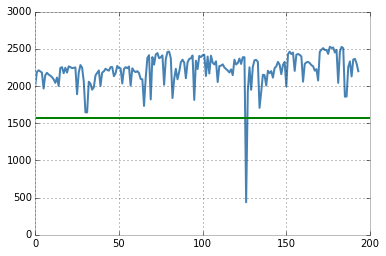

In [7]:
#Find the week with the largest Standard Deviation and thus the "event"
for i in range(194):
    if weeklyMean[i]<(rangelims[1]):
        print "The event occurs week", i
        
#plot the time series
plot(range(194), weeklyMean)
axhline(rangelims[1], c="g")

That week in history was when Hurricane Sandy hit.

### Task 2

Identify ridership types that have steadily increased in popularity, and that have steadily decreased. How much have they changed? (ratio of usage in the first 10 and last 10 weeks)

(array([ 734016.,  734138.,  734258.,  734381.,  734503.,  734624.,
         734747.,  734869.,  734989.,  735112.,  735234.]),
 <a list of 11 Text xticklabel objects>)

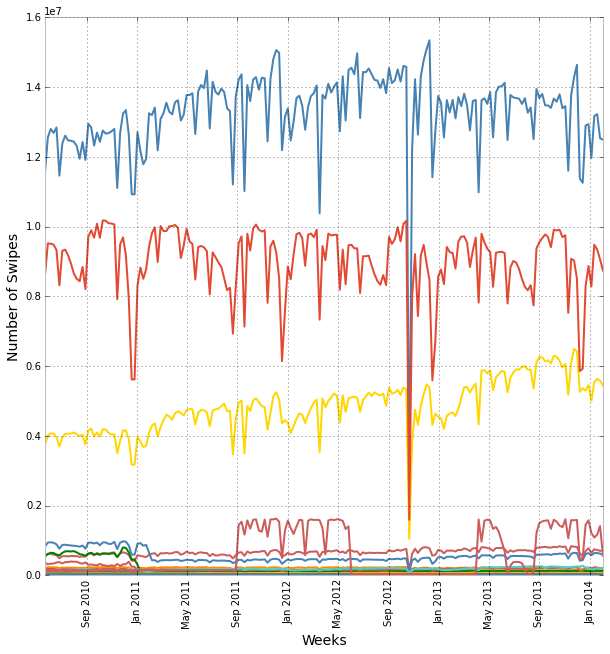

In [8]:
#Aggregated along the stations
mtaFareTypes_array = np.nansum(mtaFare_array, axis = 0)

#Plot each type of rider per week
figure(figsize=(10, 10), dpi=200)
ax = plot(mtaDates_array, np.transpose(mtaFareTypes_array))
ylabel('Number of Swipes', fontsize = 14)
xlabel('Weeks', fontsize = 14)
xticks(rotation = 90)

(194, 23)


(array([ 734016.,  734138.,  734258.,  734381.,  734503.,  734624.,
         734747.,  734869.,  734989.,  735112.,  735234.]),
 <a list of 11 Text xticklabel objects>)

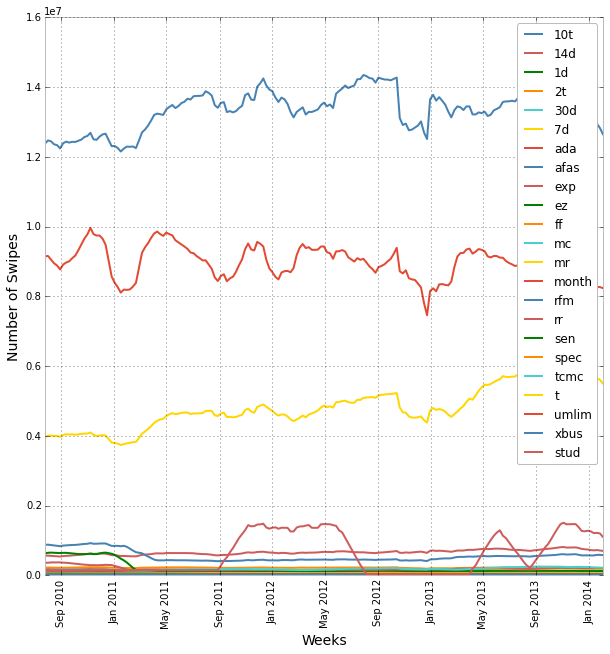

In [9]:
#Performing rolling mean
figure(figsize=(10, 10), dpi=200)
rollMeanTypes = pd.rolling_mean(np.transpose(mtaFareTypes_array), 10)
print rollMeanTypes.shape

#Plotting
ax = plot(mtaDates_array, rollMeanTypes)
ylabel('Number of Swipes', fontsize = 14)
xlabel('Weeks', fontsize = 14)
legend(ridetype_array)
xticks(rotation = 90)

[  0.98588485   0.80683228   0.93845302   1.05971932   0.98862466
   0.72797124   1.1116575    1.31220592  10.42134056  18.54224747
   1.11462065   0.86036481   0.1951276    1.51414365   1.51139169
   0.49286218   0.52782525   0.54760559   0.7076316    0.9905016
   1.03141545   0.98801994   0.13810092]


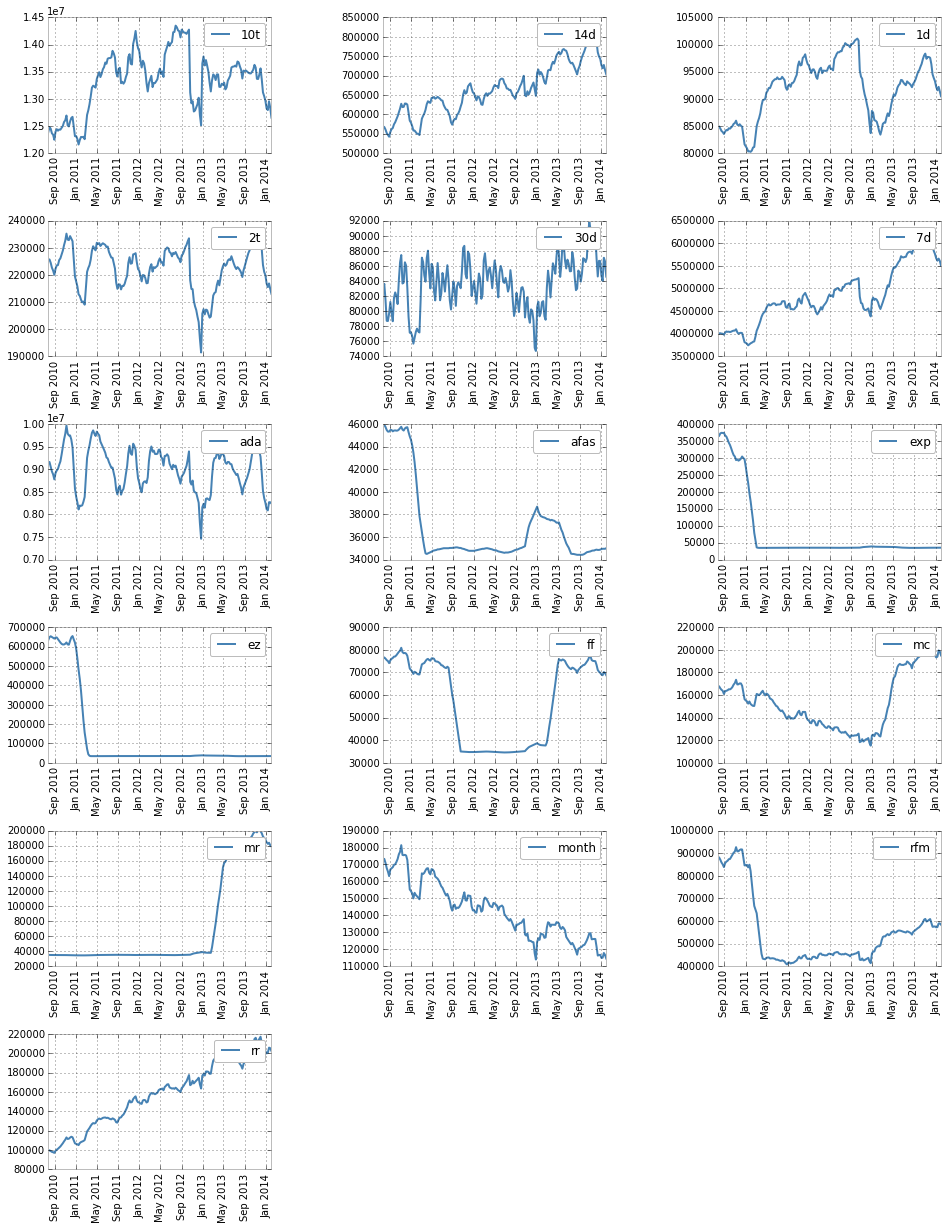

In [10]:
#Calculating ratio of rider types
riderRatio = rollMeanTypes[10,:]/rollMeanTypes[193,:]

#Ratios near 1 (above or below) represent no change from first
#to last ten weeks so those are thrown out

figure(figsize=(16, 16), dpi=200)

n = 1; j = 0

for i in riderRatio:
    if i>0.9 and i<1.1:
        continue
        j += 1
    else:
        subplot(6, 3, n)
        ax = plot(mtaDates_array, rollMeanTypes[:, j])
        legend(ridetype_array[j:])
        xticks(rotation = 90)
        n += 1; j += 1

print riderRatio

#Organizing the plots for clarity, use this again to assist
#clarifying interpretation
subplots_adjust(wspace=.5, hspace=.5, left=.125, right=.9, top=1, bottom=0)

Discussion: Above are the plots for the rolling mean of each rider type that have a change in their ratio away from 1 for the first 10 weeks to the last 10 weeks

In [11]:
#So to identify trends (increasing and decreasing), we'll
#pick them from the plots and then cycle through the 
#associated rider type showing it's rate of change

trends = [1, 5, 13, 15, 16, 17, 18, 21]

for n in trends:
    if n != 13:
        print '%s passes are increasing at an approximate rate of %.4f.' % (ridetype_array[n], riderRatio[n])
    else:
        print '%s passes are decreasing at an approximate rate of %.4f.' % (ridetype_array[n], riderRatio[n])

14d passes are increasing at an approximate rate of 0.8068.
7d passes are increasing at an approximate rate of 0.7280.
month passes are decreasing at an approximate rate of 1.5141.
rr passes are increasing at an approximate rate of 0.4929.
sen passes are increasing at an approximate rate of 0.5278.
spec passes are increasing at an approximate rate of 0.5476.
tcmc passes are increasing at an approximate rate of 0.7076.
xbus passes are increasing at an approximate rate of 0.9880.


### Task 3

Identify the 4 stations (by index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). What causes the periodic peak in rides?

In [12]:
#Since the intention is to identify stations by weeks
#we will aggregate values along ridertypes 
mta_stations = np.nansum(mtaFare_array, axis=1)
mta_stations.shape

#Fourier Tranform
ft_mtaFares = np.abs(np.fft.rfft(mta_stations))
ft_mtaFares.shape

(600, 98)

In [13]:
#Number of observations
N=194

#Sample space will be equal to one since our sampling-rate
#is one as well
sampling_rate = 1

ffreqMTA = np.fft.rfftfreq(194, 1.0/sampling_rate)
ffreqMTA.shape

(98,)

### The cell below works so run it to see all the charts. It takes time and is computionally intensive so I reset it to clean up the notebook

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


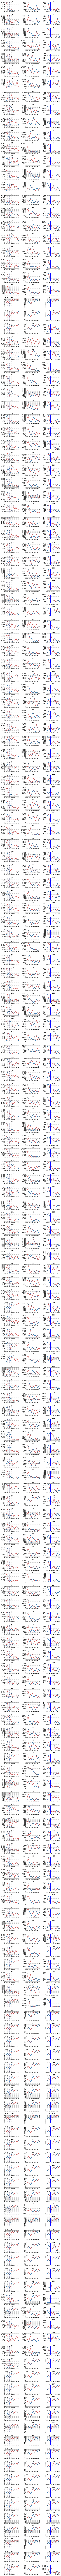

In [14]:
fig = figure(figsize=(10,400))
dfMTAstations = pd.DataFrame(mta_stations)

#There will be 600 plots
for i in range(600):
    ax = fig.add_subplot(200,3,i)
    f = np.abs(np.fft.rfft(dfMTAstations.loc[i,:]))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], 'o', ms = 8)
    ax.set_title("%i" %(i-1))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], '-')
    ax.set_xlim(0,1.0/15)
    axvline(1.0/52)
    subplots_adjust(wspace=.5, hspace=.5, left=.125, right=.9, top=1, bottom=.1)